In [35]:
#  Office Of Natiomnal Statistics - weekly deaths data. 
# Data downloaded from https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales

### MAKE SURE to download the file from above ^^ web location
### and save it as    ONS-weekly-deaths.xlsx    in same folder location

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)    # just set display options
pd.set_option('display.max_columns', 500)    # just set display options

df = pd.read_excel('ONS-weekly-deaths.xlsx', sheet_name = 'Covid-19 - Weekly occurrences', skiprows = 5)    # read the relevant sheet

In [73]:
# Function to process the data frame just to find the regional data (file is a bit messy)


def get_region(region = 'East Midlands'):    # default to East Midlands if no value is given
    df1 = df.loc[df.iloc[:,1] == region].transpose()[2:]    # This is getting the row, turning it into a column an chopping few problems rows off hte top
    df1['date'] = df1.index    # Make the date index into a column so we can process it
    df1['date'] = df1.apply(lambda row: pd.to_datetime(row['date'], errors='coerce'), axis=1)    # convert the date to a real date field
                                    # using coerce will mean any non-date type value is retuend as a NaT making next line useful
    df1.dropna(inplace = True)    # Drop any rows that have blank fields which include future dates and non date rows
    df1.rename(columns={list(df1)[0] : region}, inplace=True)    # Name the column as the region 
    return df1    # return this from the function for use in the plot

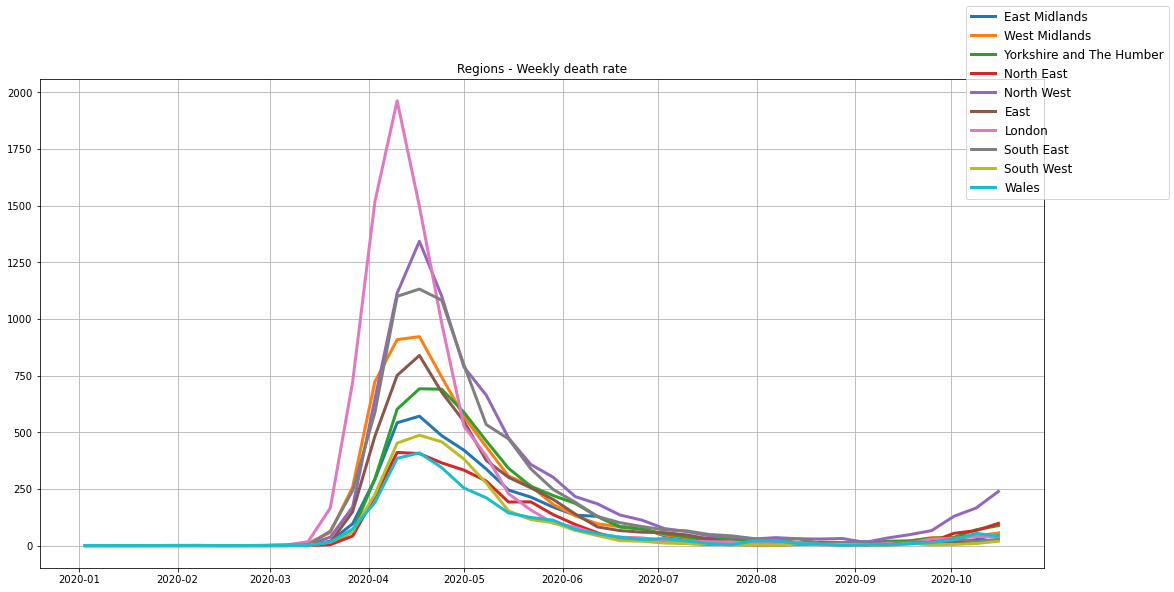

In [137]:
# We are creating an array with all the regions in
regions = ['East Midlands', 'West Midlands', 'Yorkshire and The Humber', 'North East', 'North West', 'East', 'London', 'South East', 'South West', 'Wales']

plt.rcParams["figure.figsize"] = (18,9)    # Create the plot size
fig , ax = plt.subplots(1,1)    # Shape of the sub,plots, width, height
plt.subplot(111)    # place this in which position of the subplot

for region in regions:    # loop through the array list
    df1 = get_region(region)    # call function to get this regions data
    plt.plot('date', region, data=df1, linewidth=3)   # plot the data
    plt.grid('on')    # turn on grid lines

plt.title('{} - Weekly death rate'.format("Regions"))    # set the title
fig.legend(regions, fontsize=12)    # set the legend on

plt.show()
fig.savefig('ONS-weekly-deaths.png')

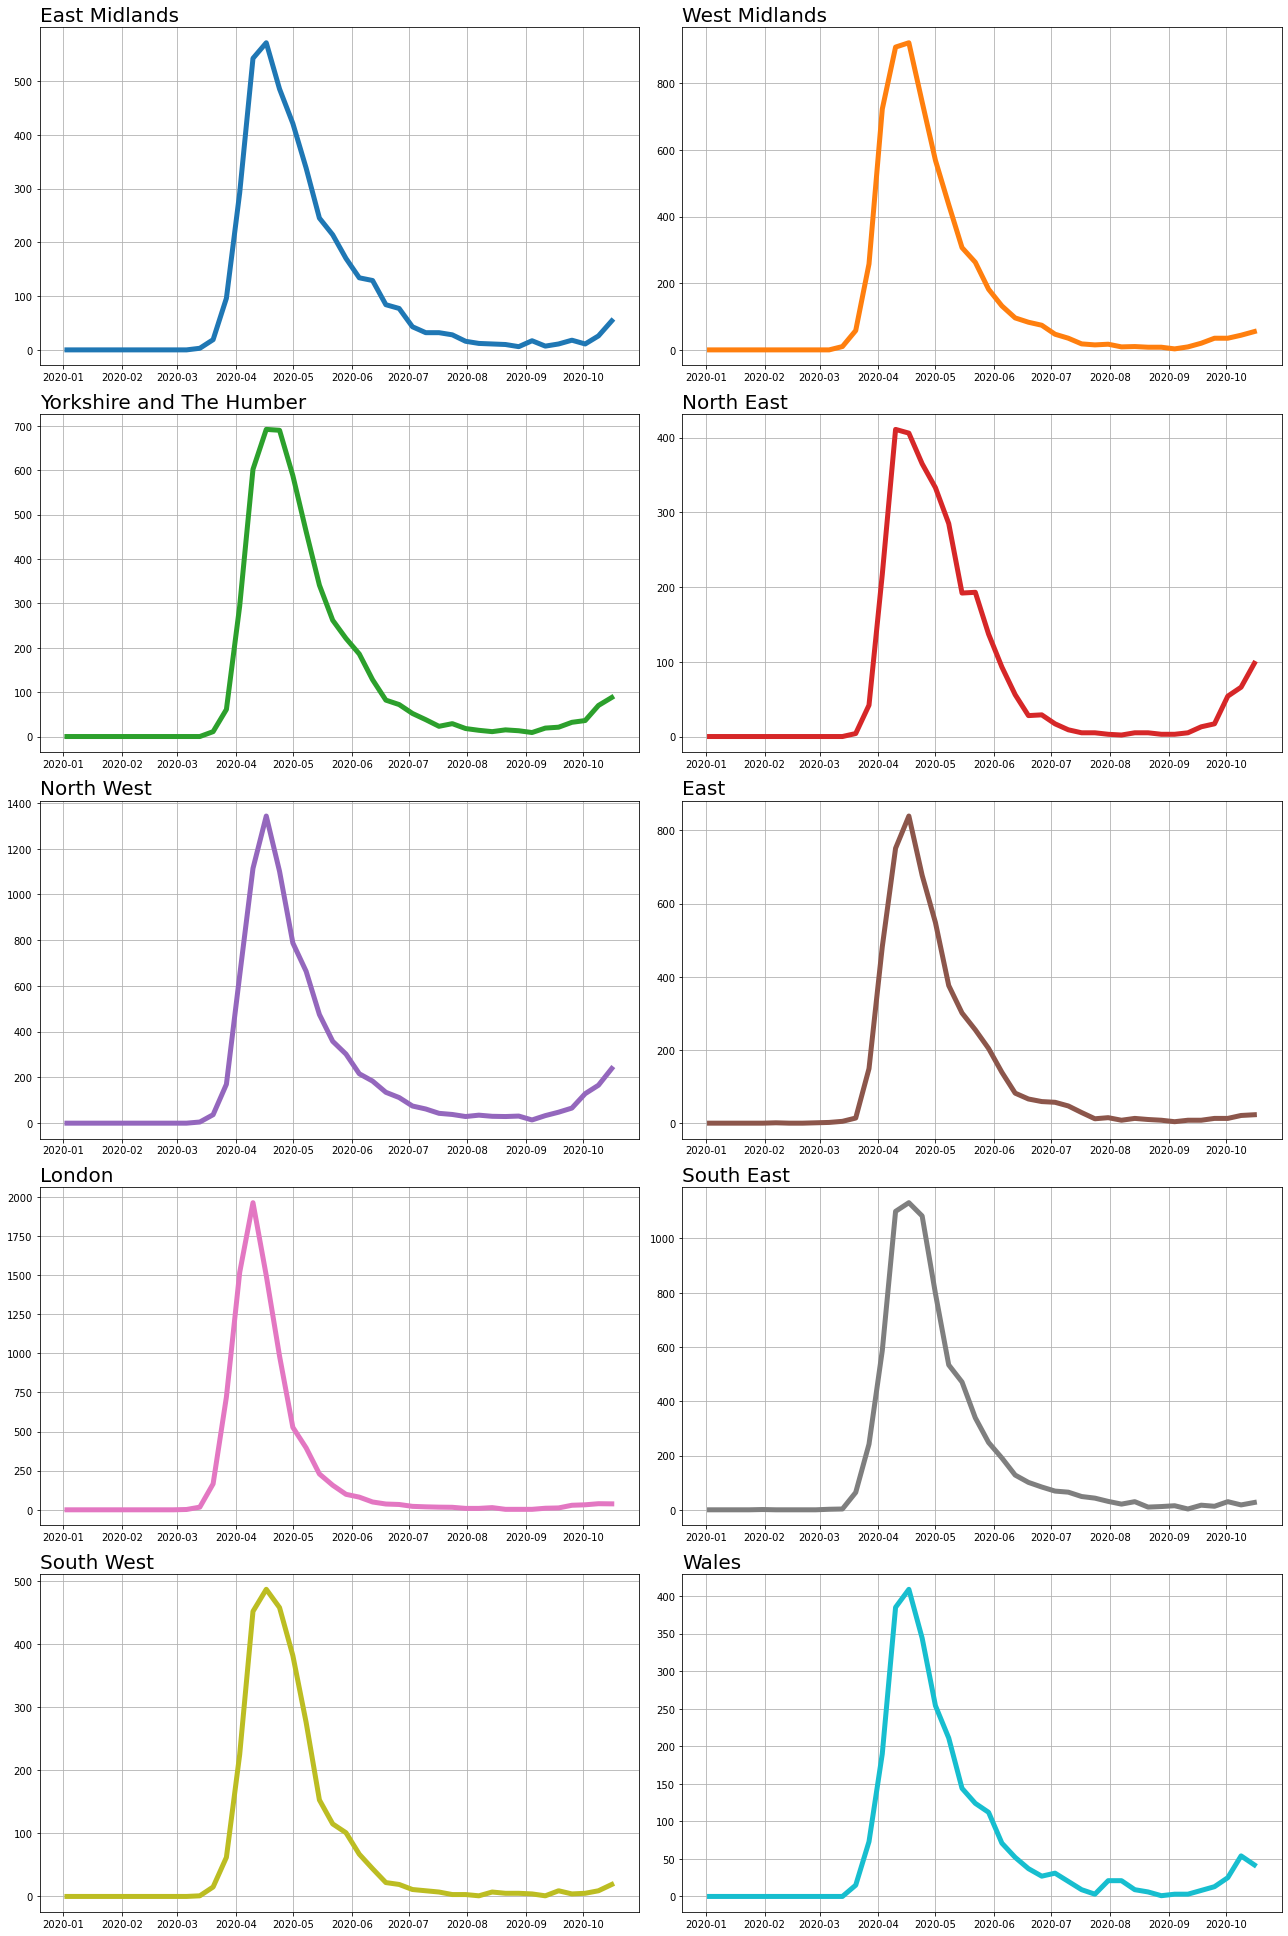

In [138]:
# Create indiviudal charts
plt.rcParams["figure.figsize"] = (18,27)    # Create the plot size
fig , ax = plt.subplots(5,2)    # Shape of the sub,plots, width, height
i = 0
for region in regions:    # loop through the array list
    i += 1
    plt.subplot(5,2,i)    # place this in which position of the subplot
    df1 = get_region(region)    # call function to get this regions data
    plt.plot('date', region, data = df1, color = 'C{}'.format(i-1), linewidth=5)   # plot the data
    plt.grid('on')    # turn on grid lines
    plt.title(region, fontsize=20, loc="Left")    # set the title
plt.tight_layout()    # Squeeze space inbetween so titles don't overlap axis
plt.show()    # show the image
fig.savefig('ONS-weekly-deaths_1.png')    # save the image